In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import pandas_ta as ta
warnings.filterwarnings('ignore')

In [15]:
# Download Tesla stock data
tesla_data = yf.download("TSLA", start="2010-01-01", end="2024-09-27")
tesla_data.to_csv('tesla_stock_data.csv')



[*********************100%***********************]  1 of 1 completed


In [16]:
tesla_data= pd.read_csv("C:/Users/ajays/OneDrive/Documents/I-Neuron Intern/notebook/tesla_stock_data.csv")

In [17]:
# Check for any missing values
missing_values = tesla_data.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
print(tesla_data.describe())


              Open         High          Low        Close    Adj Close  \
count  3586.000000  3586.000000  3586.000000  3586.000000  3586.000000   
mean     77.153159    78.844979    75.356826    77.137136    77.137136   
std     103.102020   105.391371   100.618212   103.032724   103.032724   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.755000    12.033833    11.445500    11.822833    11.822833   
50%      17.590667    17.828000    17.325000    17.587999    17.587999   
75%     170.015003   174.500000   167.090000   170.787502   170.787502   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.586000e+03  
mean   9.676522e+07  
std    7.826238e+07  
min    1.777500e+06  
25%    4.829400e+07  
50%    8.203705e+07  
75%    1.225153e+08  
max    9.140820e+08  


### Time series for the closing price to observe general trends (e.g., upward/downward trends over time).

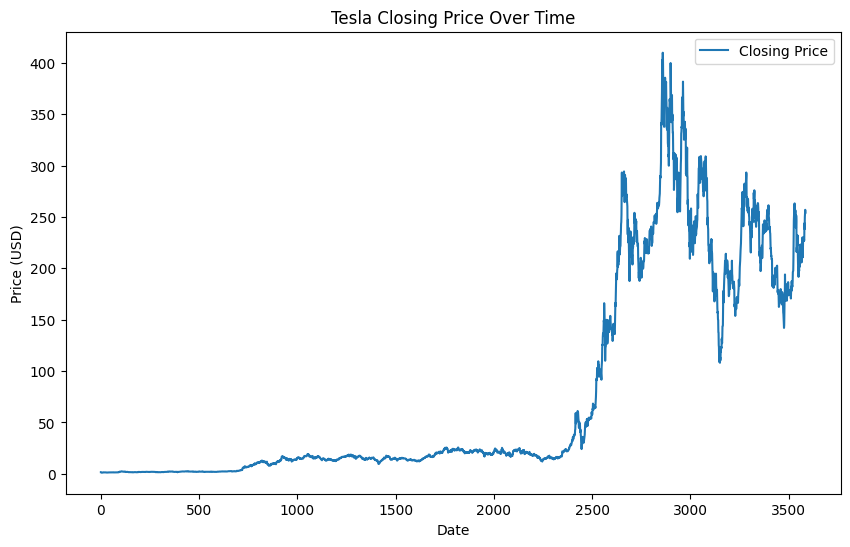

In [19]:

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Close'], label='Closing Price')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Visualize the volume of trades over time

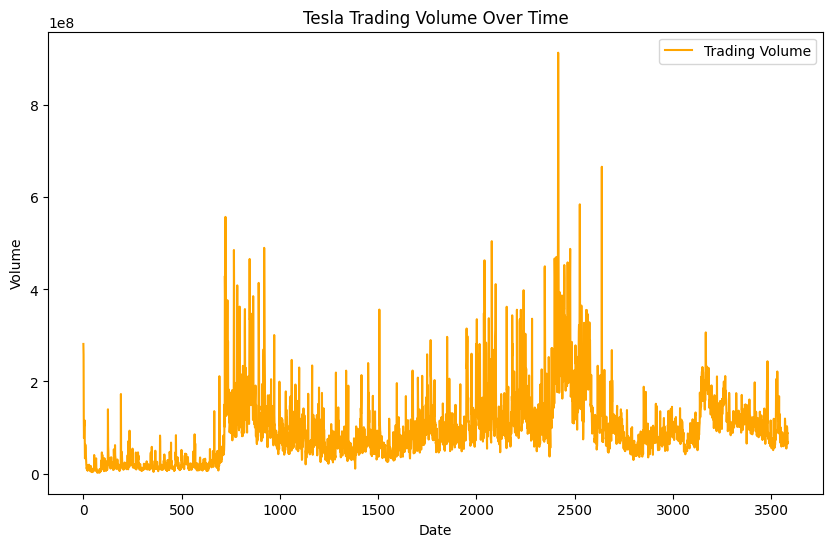

In [20]:
plt.figure(figsize=(10,6))
plt.plot(tesla_data['Volume'], label='Trading Volume', color='orange')
plt.title('Tesla Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [21]:
# Add technical indicators

import pandas_ta as ta

# Calculate the 20-day and 50-day Moving Averages
tesla_data['MA20'] = ta.sma(tesla_data['Close'], length=20)
tesla_data['MA50'] = ta.sma(tesla_data['Close'], length=50)

# Calculate RSI (Relative Strength Index)
tesla_data['RSI'] = ta.rsi(tesla_data['Close'], length=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd = ta.macd(tesla_data['Close'])
tesla_data['MACD'] = macd['MACD_12_26_9']
tesla_data['Signal Line'] = macd['MACDs_12_26_9']

# Drop any rows with NaN values
tesla_data.dropna(inplace=True)

# Display the first few rows to check if the columns are correctly added
print(tesla_data[['MA20', 'MA50', 'RSI', 'MACD', 'Signal Line']].head())


        MA20      MA50        RSI      MACD  Signal Line
49  1.301467  1.322240  56.715667  0.021898     0.010497
50  1.310833  1.318000  55.066528  0.022739     0.012945
51  1.319400  1.313120  50.566024  0.020266     0.014409
52  1.327400  1.311467  54.632896  0.021023     0.015732
53  1.335200  1.314027  57.379217  0.023504     0.017287


In [22]:
bb = ta.bbands(tesla_data['Close'], length=20)
print(bb.columns)  # This will show you the actual column names


Index(['BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0'], dtype='object')


In [23]:
# Assuming the correct column names returned are 'BBL_20_2.0', 'BBM_20_2.0', and 'BBU_20_2.0'
tesla_data['BB_upper'] = bb[bb.columns[2]]  # Upper Bollinger Band
tesla_data['BB_middle'] = bb[bb.columns[1]]  # Middle Bollinger Band (Moving Average)
tesla_data['BB_lower'] = bb[bb.columns[0]]  # Lower Bollinger Band


In [24]:
tesla_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA20',
       'MA50', 'RSI', 'MACD', 'Signal Line', 'BB_upper', 'BB_middle',
       'BB_lower'],
      dtype='object')

### Rolling Statistics

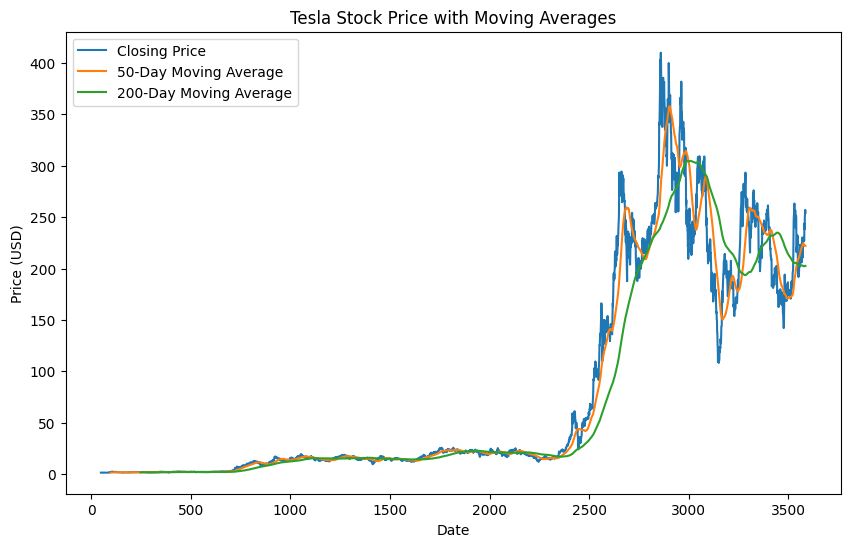

In [25]:
tesla_data['50_MA'] = tesla_data['Close'].rolling(window=50).mean()
tesla_data['200_MA'] = tesla_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Close'], label='Closing Price')
plt.plot(tesla_data['50_MA'], label='50-Day Moving Average')
plt.plot(tesla_data['200_MA'], label='200-Day Moving Average')
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


### Volatility Analysis

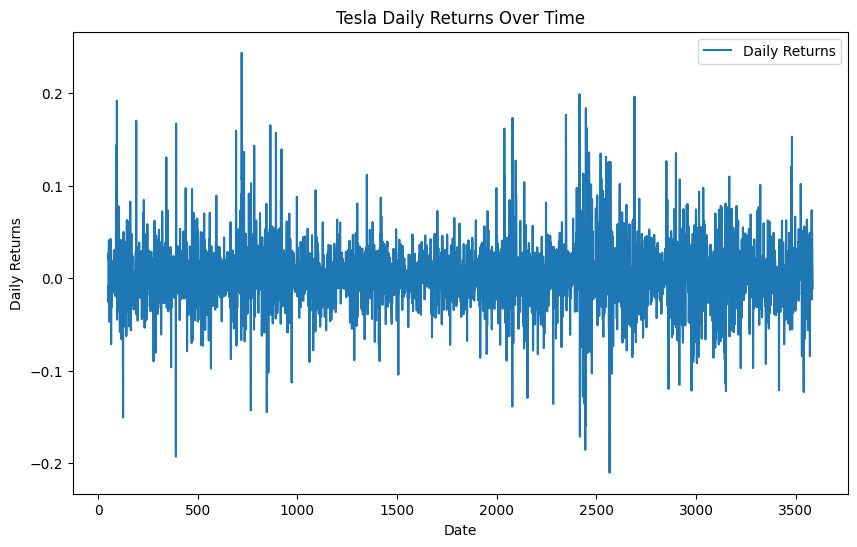

In [26]:
tesla_data['Daily_Returns'] = tesla_data['Close'].pct_change()

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Daily_Returns'], label='Daily Returns')
plt.title('Tesla Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

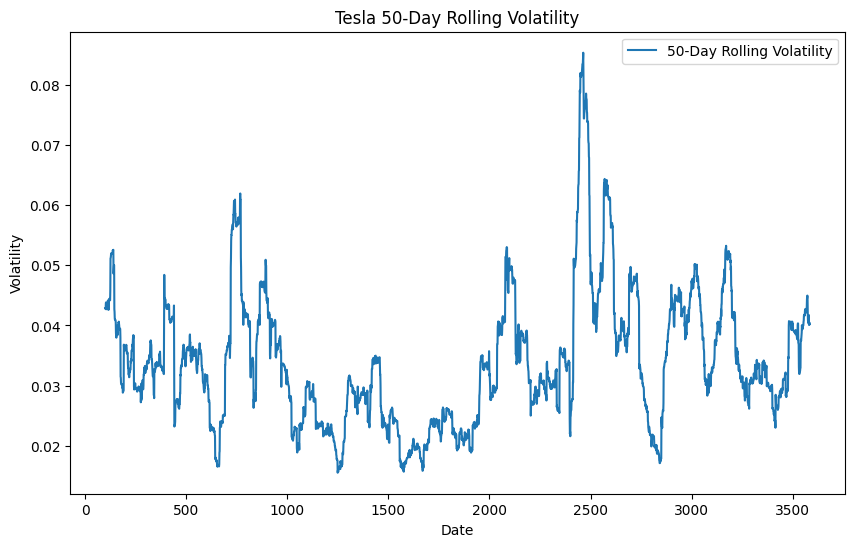

In [27]:
tesla_data['Volatility'] = tesla_data['Daily_Returns'].rolling(window=50).std()

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Volatility'], label='50-Day Rolling Volatility')
plt.title('Tesla 50-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


### Seasonality and Trends

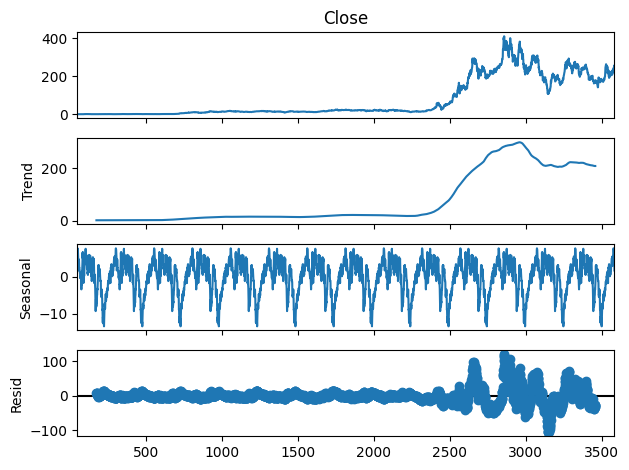

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(tesla_data['Close'], model='additive', period=252)  # Assuming daily data with 252 trading days a year
decomposition.plot()
plt.show()

## Autocorrelation and Partial Autocorrelation
### how the stock price is correlated with its past values (lag). This helps in determining how much past values influence future stock prices.

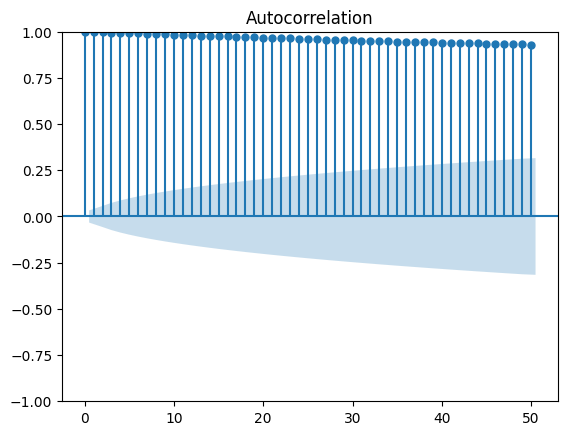

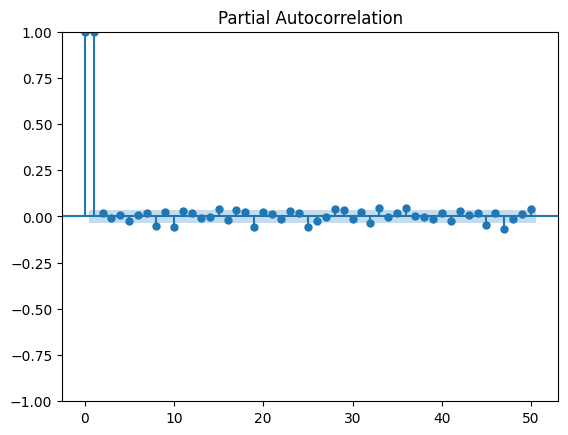

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(tesla_data['Close'].dropna(), lags=50)
plt.show()

plot_pacf(tesla_data['Close'].dropna(), lags=50)
plt.show()


### Stationarity Test (Dickey-Fuller Test)

In [30]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tesla_data['Close'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -0.9819144923368849
p-value: 0.7598032919567974


### Make the Series Stationary

In [31]:
# First-order differencing
tesla_data['Differenced_Close'] = tesla_data['Close'].diff()

# Drop any rows with NaN values caused by differencing
tesla_data.dropna(inplace=True)

# Check if the 'Differenced_Close' column is created properly
print(tesla_data.head())  # Ensure 'Differenced_Close' is a column in the DataFrame


           Date      Open      High       Low     Close  Adj Close    Volume  \
248  2011-06-22  1.824667  1.883333  1.806667  1.814000   1.814000  22134000   
249  2011-06-23  1.813333  1.848000  1.747333  1.847333   1.847333  17550000   
250  2011-06-24  1.842667  1.864667  1.817333  1.838000   1.838000  54127500   
251  2011-06-27  1.848667  1.885333  1.820667  1.830667   1.830667  27141000   
252  2011-06-28  1.852667  1.883333  1.844667  1.874000   1.874000  13338000   

         MA20      MA50        RSI      MACD  Signal Line  BB_upper  \
248  1.877767  1.818253  48.141527 -0.010036     0.004609  2.032229   
249  1.873533  1.822333  50.847087 -0.007674     0.002152  2.026451   
250  1.867167  1.825853  50.059584 -0.006480     0.000426  2.014777   
251  1.860200  1.828947  49.412038 -0.006056    -0.000871  2.000721   
252  1.853433  1.832320  53.259676 -0.002198    -0.001136  1.976531   

     BB_middle  BB_lower     50_MA    200_MA  Daily_Returns  Volatility  \
248   1.877767  1

In [32]:
tesla_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA20',
       'MA50', 'RSI', 'MACD', 'Signal Line', 'BB_upper', 'BB_middle',
       'BB_lower', '50_MA', '200_MA', 'Daily_Returns', 'Volatility',
       'Differenced_Close'],
      dtype='object')

In [39]:
tesla_data.to_csv('Updated_tesla_stock_data.csv')

In [40]:
from statsmodels.tsa.stattools import adfuller

# Re-run the ADF test on the differenced series
result = adfuller(tesla_data['Differenced_Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')




ADF Statistic: -11.022828037770502
p-value: 5.928419106400331e-20


In [41]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = tesla_data[['MA20', 'MA50', 'RSI', 'MACD', 'Signal Line']]
target = tesla_data['Close']

# Drop rows with NaN values created by rolling window functions
features = features.dropna()
target = target[features.index]

# Split the dataset into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [42]:
# Save the train and test datasets to CSV files
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)

In [43]:
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

## Model Training

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pickle

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Dictionary to store the model performance
model_performance = {}

# Train each model and calculate the performance metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the performance metrics
    model_performance[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    }

# Display the performance of each model
for model_name, metrics in model_performance.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")


Linear Regression:
  MSE: 9.7282195911428
  RMSE: 3.1190093926025293
  MAE: 1.7098664110446702
  R² Score: 0.9991211535668507
Ridge Regression:
  MSE: 9.73043247135296
  RMSE: 3.119364113301453
  MAE: 1.7107880675060105
  R² Score: 0.9991209536554628
Lasso Regression:
  MSE: 13.397892425018243
  RMSE: 3.66031315941932
  MAE: 2.1416883585795983
  R² Score: 0.9987896356718586
Random Forest:
  MSE: 8.388252293047843
  RMSE: 2.8962479681560147
  MAE: 1.2659404637737426
  R² Score: 0.9992422060851902
Gradient Boosting:
  MSE: 11.74374283512062
  RMSE: 3.4269144773572364
  MAE: 1.7872556759048335
  R² Score: 0.9989390713885751
SVR:
  MSE: 344.2140753063552
  RMSE: 18.5530071769068
  MAE: 7.546129757234037
  R² Score: 0.9689037331560443
XGBoost:
  MSE: 8.3205799578545
  RMSE: 2.8845415507242222
  MAE: 1.3200665543417256
  R² Score: 0.999248319597519
K-Nearest Neighbors:
  MSE: 14.33247373769599
  RMSE: 3.7858253707343645
  MAE: 1.7298018233980719
  R² Score: 0.9987052056849078
